# 1 Overfitting/Underfitting

## 1. Разбить выборку на train/test в некотором соотношении.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

N = 150

x = np.linspace(0, 7, N)
y_true = 2 * np.sin(x)

y = y_true + np.random.normal(0, 1, len(y_true))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


## 2. Вычислить для различных значений $d$ (степень полинома) MSE на train/test. Построить кривые MSE для train/test при различных значениях $d$.

Модели для посчета различных MSE:

In [2]:
model = np.poly1d(np.polyfit(x_train, y_train, 3))

y_pred_train = model(x_train)
y_pred_test = model(x_test)

y_train_true = 2 * np.sin(x_train)
y_test_true = 2 * np.sin(x_test)

model50 = np.poly1d(np.polyfit(x_train, y_train, 50))
y_pred_train_50 = model50(x_train)
y_pred_test_50 = model50(x_test)
y_train_true_50 = 2 * np.sin(x_train)
y_test_true_50 = 2 * np.sin(x_test)

model100 = np.poly1d(np.polyfit(x_train, y_train, 100))
y_pred_train_100 = model100(x_train)
y_pred_test_100 = model100(x_test)
y_train_true_100 = 2 * np.sin(x_train)
y_test_true_100 = 2 * np.sin(x_test)



C:\Users\Лавандос\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Лавандос\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Подсчет MSE:

In [3]:
def MSE(y_true, y):
    Q = 0
    for i in range(len(y)):
        Q += (y_true[i] - y[i]) * (y_true[i] - y[i])
    return Q / len(y)

MSE_train = np.zeros(3)
MSE_test = np.zeros(3)

MSE_train[0]= MSE(y_train_true, y_pred_train)
MSE_train[0]= MSE(y_test_true, y_pred_test)
print('Train ' + str(MSE_train[0]))
print('Test = ' + str(MSE_train[0]))

MSE_train[1]= MSE(y_train_true_50, y_pred_train_50)
MSE_test[1] = MSE(y_test_true_50, y_pred_test_50)
print('Train ' + str(MSE_train[1]))
print('Test = ' + str(MSE_train[1]))

MSE_train[2] = MSE(y_train_true_100, y_pred_train_100)
MSE_test[2]= MSE(y_test_true_100, y_pred_test_100)
print('Train ' + str(MSE_train[2]))
print('Test = ' + str(MSE_train[2]))


Train 0.14429220783764538
Test = 0.14429220783764538
Train 0.31437323599498124
Test = 0.31437323599498124
Train 0.32673675126511065
Test = 0.32673675126511065


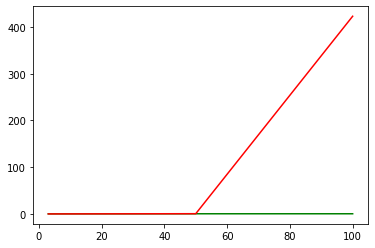

In [4]:
plt.plot([3, 50, 100], MSE_train, c='green')
plt.plot([3, 50, 100], MSE_test, c='red')

## 3. Как изменяется качество модели, если в нее добавить больше данных (увеличить $N$)? Привести несколько примеров.

Происходит переобучение

## 4. Какие выводы можно сделать из пунктов 2 и 3. Как влияет сложность модели и количество данных на переобучение (overfitting)?

# 1) При увеличении сложности модели происходит переобучение. 
# 2) При увеличении данных переобучение уменьшается.

# Коэффициент детерминации $R^2$

Код для вычисления $R^2$:

In [5]:
def m(y):
    ysum = 0
    for i in range(len(y)):
        ysum += y[i]
    return ysum / len(y)


def denum(y):
    sumDen = 0
    ym = m(y)
    for i in range(len(y)):
        sumDen += (y[i] - ym) * (y[i] - ym)
    return sumDen


def R2(y_true, y):
    num = MSE(y_true, y) * len(y)
    den = denum(y_true)
    return 1 - num / den


## 1. Определить $R^2$ для различных $d$. Сделать выводы.

In [6]:
print("R2 для d=3 : " + str(R2(y_pred_test, y[:len(y_test_true)])))
print("R2 для d=50 : " + str(R2(y_pred_test_50, y[:len(y_test_true_50)])))
print("R2 для d=100 : " + str(R2(y_pred_test_100, y[:len(y_test_true_50)])))


R2 для d=3 : -0.9564308768706229
R2 для d=50 : -0.7691517446558633
R2 для d=100 : -0.012815699408075032


Такие значения R2 получаются из-за того, что модель не совсем подходит для обучения.

## 2. Ранее было указано, что одним из простых baseline для нашей задачи, может быть выборочнее среднее. Расмотрим модель, которая для всех объектов возвращает константное значение (полином нулевой степени): $\hat{y} (x) = w_0$. Аналитически определить параметры модели ($w_0$), минимизирующие MSE.

## 3. Определить аналогично baseline для MAE.

# 2. Linear models

## 1. Regression

### Для одномерного случая ($D=1$, $\hat{y} = w_0 + w_1x$) найти вид выражений для $\textbf{w}^* = (w_0^*, w_1^*)$, минимизирующее MSE.

### Используя нормальное уравнение линейной регресси, найти значение $\textbf{w}^*$.

## 2.1 Gradient descent

### Реализовать метод градиентного спуска для одной из указанных функций

Функция Химмельблау:

In [7]:
def f(x):
    x, y = x[0], x[1]
    return (x[0] * x[0] + x[1] - 11) ** 2 + (x[0] + x[1] * x[1] - 7) ** 2

def grad(x): 
    grad_x = 4 * x[0] * x[0] * x[0] + 4 * x[0] * x[1] - 42 * x[0] + 2 * x[1] * x[1] - 14
    grad_y = -26 * x[1] + 2 * x[0] * x[0] - 22 + 4 * x[1] * x[1] * x[1] + 4 * x[0] * x[1]
    return np.array([grad_x, grad_y])
    
def grad_desc(x0, grad):
    for i in range (1, 1000):
        x0 = x0 - grad(x0) * 0.001
    return x0

Тесты

In [8]:
print(grad_desc([0, 0], grad))
print(grad_desc([-5, -5], grad))

[3. 2.]
[-3.77931025 -3.28318599]


### Определить вид градиента в случае MSE. Применить метод градиентного спуска для поиска весов линейной регрессии для представленных выше данных. Построить график зависимости эмпирического риска $Q(\textbf{w}^{(k)})$ от шага $k$. Сравнить с точным решением.

In [9]:
#ГРАДИЕНТ МSE
def dMSEdw_1(x, y, w, i, k):
    sum = 0
    for j in range(len(w)):
        sum += w[j] * x[i][j]
    sub = (y[i] - sum) * x[i][k]
    return sub

def dMSEdw(x, y, w, k):
    d = 0
    for i in range(len(y)):
        d += dMSEdw_1(x, y, w, i, k)
    d *= (-2.0/len(y))
    return d

def grad_mse(X, y, w):
    grad = np.zeros((len(w), 1))
    for i in range(len(w)):
        grad[i] = dMSEdw(X, y, w, i)
    return grad

# ГРАДИЕНТНЫЙ СПУСК
def exit(P, P_pred, eps):
    fl = False
    for i in range(len(P)):
        if abs(P[i] - P_pred[i]) < eps:
            fl = True
    return fl

def grad_desc(X, y, w, k, f):
    eps = 0.00001
    a = 1 / 1000
    P = np.copy(w)
    P_pred = np.copy(w)
    P -= a * f(X, y, w)
    while k > 0:
        if exit(P, P_pred, eps):
            break
        P_pred = np.copy(P)
        P -= a * f(X, y, w)
        k -= 1
    return P

#нормальное ур-ие лин.регр
def n_eq(X, y):
    x_transpose = np.transpose(X)
    x_res = np.matmul(np.linalg.inv(np.matmul(x_transpose, X)), x_transpose)
    return np.matmul(x_res, y)

Находим w с помощью линейной регрессии:

In [10]:
import random

N = 10
D = 2
X = np.random.uniform(0, 1, (N, D))

D += 1
x_ones = np.ones((N, 1))
X = np.hstack((x_ones, X))

w_true = np.random.uniform(-5, 10, (D, 1))

y = X@w_true

w = n_eq(X, y)

#Добавим шум и найдём w с помощью GD
P = w + np.random.normal(0, len(w))

print(grad_desc(X, y, P, 30, grad_mse))

size = 100

k = np.zeros((size, 1))
Qk = np.zeros((size, 1))

for i in range (size):
    k[i] = i
    Qk[i] = MSE(w_true, grad_desc(X, y, P, i, grad_mse))

[[-2.33911245]
 [-2.09640362]
 [ 2.30677293]]


## 2.2 Stochastic gradient descent (SGD)

### Применить метод стохастического градиентного спуска для поиска весов линейной регрессии (при разных размерах батча) для представленных выше данных. Построить график зависимости эмпирического риска $Q(w(k))$ от шага $k$. Сравнить скорость сходимости с методом градиентного спуска. Сравнить с точным решением.

Метод стохастического градиентного спуска:

In [11]:
def sgd_mse(X, y, w):
    N = len(y)
    m = len(X[0])
    d = 1
    rand = random.sample(range(0, N), d)
    y_new = np.zeros((d, 1))
    X_new = np.zeros((d, m))
    for i in range(d):
        y_new[i] = y[rand[i]]
        X_new[i] = X[rand[i]]
    return grad_mse(X_new, y_new, w)

Применяем метод:

In [12]:
print(grad_desc(X, y, P, 25, sgd_mse))

k_sgd = np.zeros((size, 1))
Qk_sgd = np.zeros((size, 1))

for i in range (size):
    k_sgd[i] = i
    Qk_sgd[i] = MSE(w_true, grad_desc(X, y, P, i, sgd_mse))

[[-2.29108057]
 [-2.07073676]
 [ 2.31381829]]


# Сравнение методов:
# Красный - GD
# Зелёный - SGD

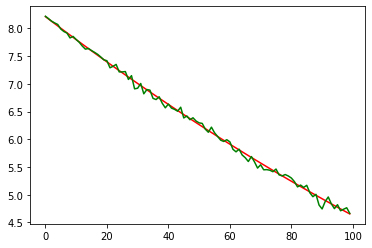

In [13]:
plt.plot(k, Qk, c='red')
plt.plot(k_sgd, Qk_sgd, c='green')
plt.show()